In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00264/EEG%20Eye%20State.arff', comment='@', header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def U_Time(input_shape):
    X_input = Input(input_shape)
    
    # Convolutional layer 1
    X = Conv1D(64, 3, activation='relu', padding='same')(X_input)
    X = MaxPooling1D(pool_size=2, strides=2, padding='same')(X)

    # Convolutional layer 2
    X = Conv1D(128, 3, activation='relu', padding='same')(X)
    X = MaxPooling1D(pool_size=2, strides=2, padding='same')(X)

    # Convolutional layer 3
    X = Conv1D(256, 3, activation='relu', padding='same')(X)
    X = MaxPooling1D(pool_size=2, strides=2, padding='same')(X)

    # Flatten layer
    X = Flatten()(X)

    # Dense layer
    X = Dense(128, activation='relu')(X)

    # Output layer
    X = Dense(1, activation='sigmoid')(X)

    model = Model(inputs=X_input, outputs=X)

    return model


# Generate sample data
X_train = np.random.randn(100, 14)
y_train = np.random.randint(0, 2, size=(100,))

# Reshape the input data to have a shape of (100, 14, 1)
X_train = X_train.reshape(-1, X_train.shape[1], 1)

# Expand the dimensions of the labels to have a shape of (100, 1)
y_train = np.expand_dims(y_train, axis=-1)

input_shape = (X_train.shape[1], 1)

model = U_Time(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
4/4 [==============================] - 2s 10ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 2/25
4/4 [==============================] - 0s 10ms/step - loss: 0.6664 - accuracy: 0.5400
Epoch 3/25
4/4 [==============================] - 0s 10ms/step - loss: 0.6402 - accuracy: 0.6300
Epoch 4/25
4/4 [==============================] - 0s 10ms/step - loss: 0.6479 - accuracy: 0.5400
Epoch 5/25
4/4 [==============================] - 0s 9ms/step - loss: 0.6245 - accuracy: 0.6600
Epoch 6/25
4/4 [==============================] - 0s 11ms/step - loss: 0.5887 - accuracy: 0.7200
Epoch 7/25
4/4 [==============================] - 0s 11ms/step - loss: 0.5439 - accuracy: 0.8000
Epoch 8/25
4/4 [==============================] - 0s 10ms/step - loss: 0.5015 - accuracy: 0.8500
Epoch 9/25
4/4 [==============================] - 0s 9ms/step - loss: 0.4593 - accuracy: 0.8200
Epoch 10/25
4/4 [==============================] - 0s 12ms/step - loss: 0.4252 - accuracy: 0.8500
Epoch 11/25
4/4 [==============

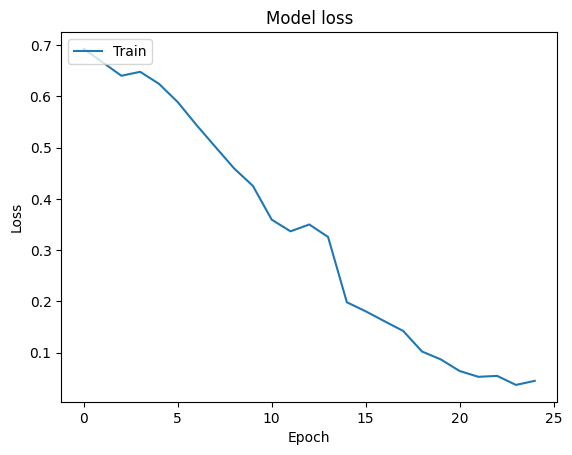

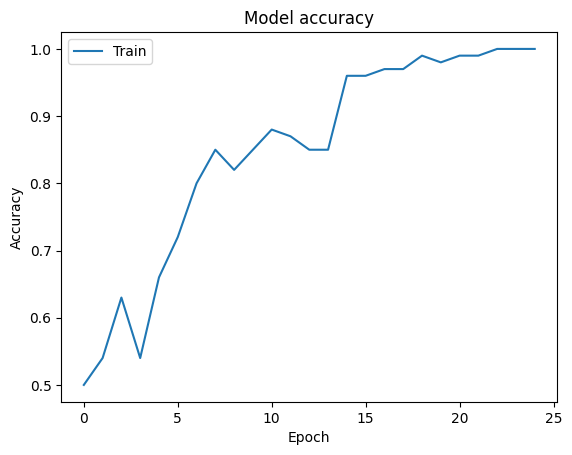

In [ ]:
model = U_Time(input_shape)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()